# **Revised Project Statement:** 

For the Heart Disease Dataset, we want to classify the presence of heart disease using the best combinations of the dataset files (Cleveland, Hungarian, Switzerland, VA) based on the most relevant patient attributes.


**Well defined Question:**

How accurately can we predict the presence of heart disease using classification?


---
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


---
**14 Attributes used:**

age, sex, cp, trestbps,chol, fbs, restecg,thalach, exang, oldpeak, slope, ca, thal,num

**Description of 13 Input variables**

**Age:** age of the patient

**Sex:**

0: Female

1: Male

**Chest Pain Type (cp):**

0: Typical Angina

1: Atypical Angina

2: Non-Anginal Pain

3: Asymptomatic

**Resting Blood Pressure:** Person's resting blood pressure(trestbps).

**Cholesterol (chol):** Serum Cholesterol in mg/dl

**Fasting Blood Sugar (fbs):**

0:Less Than 120mg/ml

1: Greater Than 120mg/ml

**Resting Electrocardiographic Measurement(restecg):**

0: Normal

1: ST-T Wave Abnormality

2: Left Ventricular Hypertrophy

**Max Heart Rate Achieved (thalch):** Maximum Heart Rate Achieved 

**Exercise Induced Angina (exang):**

1: Yes

0: No

**ST Depression (oldpeak):** ST depression induced by exercise relative to rest.
**Slope:** Slope of the peak exercise ST segment (slope):

0: Upsloping

1: Flat

2: Downsloping

**Thalassemia (thal):** A blood disorder called 'Thalassemia' :

0: Normal

1: Fixed Defect

2: Reversible Defect

**Number of Major Vessels (ca):** Number of major vessels colored by fluoroscopy.

** 1 Output variables:** 
**num:** diagnosis of heart disease (angiographic disease status): 
    
 0-  < 50% diameter narrowing 
 
 1- > 50% diameter narrowing

---


##**Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

##**Loading all the dataset**

**Upload the Cleveland Data**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv


Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
import io
cleveland_df= pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**Upload Switzerland data**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
switzerland_df= pd.read_csv(io.BytesIO(uploaded['processed.switzerland.data']), header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df 


Saving processed.switzerland.data to processed.switzerland.data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


**Upload the Hungarian dataset**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
hungarian_df= pd.read_csv(io.BytesIO(uploaded['processed.hungarian.data']), header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df 

Saving processed.hungarian.data to processed.hungarian.data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


**Upload the VA dataset**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
va_df= pd.read_csv(io.BytesIO(uploaded['processed.va.data']), header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df 


Saving processed.va.data to processed.va.data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


**Shape of the datasets**

In [ ]:
print(" Cleveland dataset: ( rows, columns) = ",cleveland_df.shape)
print(" Switzerland dataset: ( rows, columns) = ",switzerland_df.shape)
print(" Hungarian dataset: ( rows, columns) = ",hungarian_df.shape)
print(" VA dataset: ( rows, columns) = ",va_df.shape)


 Cleveland dataset: ( rows, columns) =  (303, 14)
 Switzerland dataset: ( rows, columns) =  (123, 14)
 Hungarian dataset: ( rows, columns) =  (294, 14)
 VA dataset: ( rows, columns) =  (200, 14)


**Check the missing values in each columns**

In [ ]:
# Missing data in Cleveland dataset marking as Nan and finding its frequency in each column
cleveland_df = cleveland_df.replace('?', np.nan)
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
cleveland_nan

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Missing data in Switzerland dataset marking as Nan and finding its frequency in each column
switzerland_df = switzerland_df.replace('?', np.nan)
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
switzerland_nan

,0
age,0
sex,0
cp,0
trestbps,2
chol,0
fbs,75
restecg,1
thalach,1
exang,1
oldpeak,6


In [ ]:
# Missing data in Hungarian dataset marking as Nan and finding its frequency in each column
hungarian_df = hungarian_df.replace('?', np.nan)
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
hungarian_nan

,0
age,0
sex,0
cp,0
trestbps,1
chol,23
fbs,8
restecg,1
thalach,1
exang,1
oldpeak,0


In [ ]:
# Missing data in VA dataset marking as Nan and finding its frequency in each column
va_df = va_df.replace('?', np.nan)
va_nan = pd.DataFrame(va_df.isnull().sum())
va_nan

,0
age,0
sex,0
cp,0
trestbps,56
chol,7
fbs,7
restecg,0
thalach,53
exang,53
oldpeak,56


**Descriptive statistics of the each features( this will help use to identify some type errors or sometimes zero rows**

In [ ]:
cleveland_df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299,301,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [ ]:
switzerland_df.describe(include='all')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121,123.0,48,122,122,122,117,106,5,71,123.000000
unique,NaN,NaN,NaN,20,NaN,2,3,67,2,35,3,2,3,NaN
top,NaN,NaN,NaN,115,NaN,0,0,120,0,0,2,2,7,NaN
freq,NaN,NaN,NaN,14,NaN,43,85,9,68,42,61,3,42,NaN
mean,55.317073,0.918699,3.699187,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.804878
std,9.032108,0.274414,0.688726,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.013503
min,32.000000,0.000000,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,51.000000,1.000000,4.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,56.000000,1.000000,4.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,61.500000,1.000000,4.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


In [ ]:
hungarian_df.describe(include="all")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293,271,286,293,293,293,294.000000,104,3,28,294.000000
unique,NaN,NaN,NaN,31,153,2,3,71,2,NaN,3,1,3,NaN
top,NaN,NaN,NaN,120,275,0,0,150,0,NaN,2,0,7,NaN
freq,NaN,NaN,NaN,65,5,266,235,29,204,NaN,91,3,11,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


In [ ]:
va_df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,144,193,193,200.000000,147,147,144,98,2,34,200.000000
unique,NaN,NaN,NaN,40,99,2,NaN,59,2,14,3,1,3,NaN
top,NaN,NaN,NaN,120,0,0,NaN,120,1,0,2,0,7,NaN
freq,NaN,NaN,NaN,16,49,125,NaN,12,95,40,53,2,22,NaN
mean,59.350000,0.970000,3.505000,NaN,NaN,NaN,0.735000,NaN,NaN,NaN,NaN,NaN,NaN,1.520000
std,7.811697,0.171015,0.795701,NaN,NaN,NaN,0.683455,NaN,NaN,NaN,NaN,NaN,NaN,1.219441
min,35.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,55.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,60.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,64.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


#**Data Cleaning**

 ## Basic Data cleaning


Redantant columns : 

**Identifying the columns with single values:**  Delete them

**Identifying  the columns with very few values but more than one:**

Be careful before deleting as it might be representing the categorical dataset. 



  

In [ ]:
# Checking for Redundant columns

print("\n\nUnique column values in Cleveland dataset\n", cleveland_df.nunique())




Unique column values in Cleveland dataset
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in Switzerland dataset\n", switzerland_df.nunique())



Unique column values in Switzerland dataset
 age         37
sex          2
cp           4
trestbps    20
chol         1
fbs          2
restecg      3
thalach     67
exang        2
oldpeak     35
slope        3
ca           2
thal         3
num          5
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in Hungarian dataset\n", hungarian_df.nunique())




Unique column values in Hungarian dataset
 age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            1
thal          3
num           2
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in VA dataset\n", va_df.nunique())



Unique column values in VA dataset
 age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
num          5
dtype: int64


**Decision:** No column has only one value and the columns with very few values(more than one) are categorical columns.. not deleting any  

*Basic data cleaning*

Duplicate Rows

In [ ]:
dups_cleveland=cleveland_df.duplicated()
print(dups_cleveland.any())
print(cleveland_df[dups_cleveland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [ ]:
dups_switzerland=switzerland_df.duplicated()
print(dups_switzerland.any())
print(switzerland_df[dups_switzerland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [ ]:
dups_hungarian= hungarian_df.duplicated()
print(dups_hungarian.any())
print(hungarian_df[dups_hungarian])

True
     age  sex  cp trestbps chol fbs  ... exang oldpeak slope   ca thal num
102   49    0   2      110  NaN   0  ...     0     0.0   NaN  NaN  NaN   0

[1 rows x 14 columns]


In [ ]:
dups_va= va_df.duplicated()
print(dups_va.any())
print(va_df[dups_va])

True
     age  sex  cp trestbps chol fbs  ...  exang oldpeak slope   ca thal num
187   58    1   3      150  219   0  ...      1       0   NaN  NaN  NaN   2

[1 rows x 14 columns]


#**Imuputation**
We will run *KNN imputer* and *Iterative imputer* on 5 different combination of dataframes as follows:


In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import os
import warnings

warnings.filterwarnings('ignore')

##**Creating different Dataframes**

Below are the combination of different dataset 
1. Cleveland , hungarian , switzerland , Va
2. Cleveland , hungarian  
3. Cleveland , switzerland
4. Cleveland , hungarian , switzerland
5. Cleveland


We are trying to find best K value for KNN_Imputer by applying RandomforestClassifier to find bext accuracy

###**1. Cleveland + hungarian + switzerland + Va**

In [ ]:
#Complete dataset
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])
Heart_Disease_DF.shape

(920, 14)

###**2. Cleveland + hungarian**

In [ ]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

###**3. Cleveland + switzerland**

In [ ]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

###**4. Cleveland + switzerland + hungarian**

In [ ]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

###**--------------------KNN imputation-------------------------**


###**KNN Imputer** 

* Use MinMaxScaler to scale X
* Converting target variables to binary


In [ ]:
#function to optimize the knn imputer
def optimize_knn_imputer(data, target,name):
    results = list()
    dict = {'Name':[],
        'K':[],
        'MeanAccuracy':[],
        'stdAccuracy':[]
       }
    df = pd.DataFrame(dict)
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #converting target variables to binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

    
        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
        #print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))   
    #max(results)
    display(df)
    pyplot.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    pyplot.show()
    return df
    #df.loc[df['MeanAccuracy'] == df['MeanAccuracy'].max()] 

###**1. KNN imputation on Cleveland + hungarian + switzerland + Va**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian+switzerland+va,1.0,0.822101,0.027280
1,cleveland+hungarian+switzerland+va,3.0,0.831884,0.027745
2,cleveland+hungarian+switzerland+va,5.0,0.826087,0.031378
3,cleveland+hungarian+switzerland+va,7.0,0.819928,0.032206
4,cleveland+hungarian+switzerland+va,9.0,0.830435,0.032318
5,cleveland+hungarian+switzerland+va,11.0,0.824275,0.031638
6,cleveland+hungarian+switzerland+va,13.0,0.831159,0.028995
7,cleveland+hungarian+switzerland+va,15.0,0.826449,0.036965
8,cleveland+hungarian+switzerland+va,17.0,0.822101,0.027851
9,cleveland+hungarian+switzerland+va,19.0,0.827536,0.028995


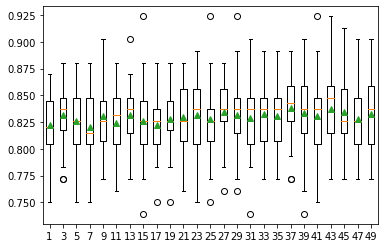

In [ ]:
df1 = optimize_knn_imputer(Heart_Disease_DF,'num','cleveland+hungarian+switzerland+va')

In [ ]:
df1.loc[df1['MeanAccuracy'] == df1['MeanAccuracy'].max()] 
# getting slightly different result than anwesh

,Name,K,MeanAccuracy,stdAccuracy
18,cleveland+hungarian+switzerland+va,37.0,0.838043,0.03117


###**2. KNN imputation on Cleveland + hungarian**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian,1.0,0.828597,0.045869
1,cleveland+hungarian,3.0,0.843682,0.042083
2,cleveland+hungarian,5.0,0.835311,0.043339
3,cleveland+hungarian,7.0,0.837561,0.042624
4,cleveland+hungarian,9.0,0.833663,0.048297
5,cleveland+hungarian,11.0,0.833126,0.036475
6,cleveland+hungarian,13.0,0.838145,0.040517
7,cleveland+hungarian,15.0,0.834736,0.042391
8,cleveland+hungarian,17.0,0.833616,0.042409
9,cleveland+hungarian,19.0,0.836403,0.033618


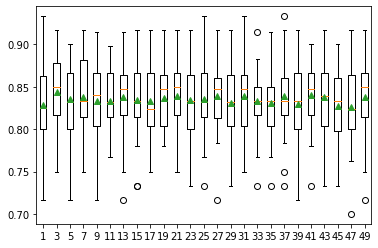

In [ ]:
df2 = optimize_knn_imputer(Clev_hung_df,'num','cleveland+hungarian')

In [ ]:
df2.loc[df2['MeanAccuracy'] == df2['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
1,cleveland+hungarian,3.0,0.843682,0.042083


###**3. KNN imputation on Cleveland + Switzerland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+switzerland,1.0,0.843503,0.060370
1,cleveland+switzerland,3.0,0.855260,0.055062
2,cleveland+switzerland,5.0,0.848228,0.056731
3,cleveland+switzerland,7.0,0.848948,0.066982
4,cleveland+switzerland,9.0,0.856737,0.056449
5,cleveland+switzerland,11.0,0.850517,0.051149
6,cleveland+switzerland,13.0,0.853673,0.055605
7,cleveland+switzerland,15.0,0.857530,0.060402
8,cleveland+switzerland,17.0,0.859893,0.054010
9,cleveland+switzerland,19.0,0.857512,0.056562


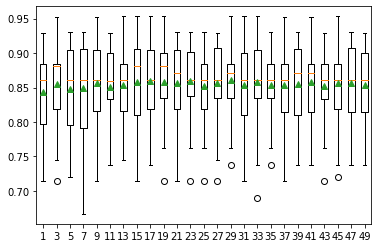

In [ ]:
df3 = optimize_knn_imputer(Clev_switz_df,'num','cleveland+switzerland')

In [ ]:
df3.loc[df3['MeanAccuracy'] == df3['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
14,cleveland+switzerland,29.0,0.861443,0.053701


###**4. KNN imputation on Cleveland + hungarian + switzerland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland+hungarian+switzerland,1.0,0.844444,0.032155
1,cleveland+hungarian+switzerland,3.0,0.857870,0.027704
2,cleveland+hungarian+switzerland,5.0,0.843056,0.032700
3,cleveland+hungarian+switzerland,7.0,0.848611,0.030078
4,cleveland+hungarian+switzerland,9.0,0.844907,0.035334
5,cleveland+hungarian+switzerland,11.0,0.845370,0.032618
6,cleveland+hungarian+switzerland,13.0,0.849537,0.031688
7,cleveland+hungarian+switzerland,15.0,0.850000,0.033717
8,cleveland+hungarian+switzerland,17.0,0.851852,0.032539
9,cleveland+hungarian+switzerland,19.0,0.856481,0.034084


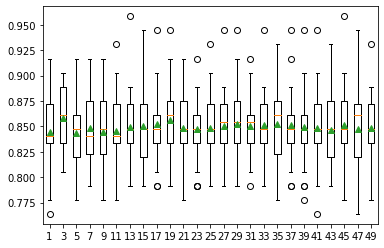

In [ ]:
df4 = optimize_knn_imputer(Clev_hung_switz_df,'num','cleveland+hungarian+switzerland')

In [ ]:
df4.loc[df4['MeanAccuracy'] == df4['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
1,cleveland+hungarian+switzerland,3.0,0.85787,0.027704


###**5. KNN imputation on Cleveland**

,Name,K,MeanAccuracy,stdAccuracy
0,cleveland,1.0,0.826165,0.057195
1,cleveland,3.0,0.817455,0.053543
2,cleveland,5.0,0.821828,0.049260
3,cleveland,7.0,0.816237,0.060306
4,cleveland,9.0,0.815233,0.058645
5,cleveland,11.0,0.826129,0.050484
6,cleveland,13.0,0.826272,0.047723
7,cleveland,15.0,0.825090,0.057252
8,cleveland,17.0,0.825125,0.054394
9,cleveland,19.0,0.826201,0.052338


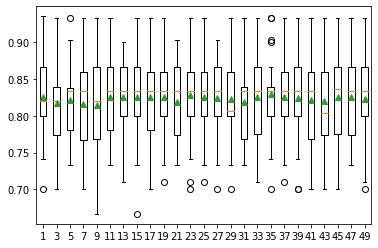

In [ ]:
df5 = optimize_knn_imputer(cleveland_df,'num','cleveland')

In [ ]:
df5.loc[df5['MeanAccuracy'] == df5['MeanAccuracy'].max()] 

,Name,K,MeanAccuracy,stdAccuracy
17,cleveland,35.0,0.82957,0.048719


#**Iterative Imputation-**

---



##**Iterative Imputer**

In [ ]:
def optimize_IterativeImputer_imputer(data, target,name):

    results = list()
    dict={'Name': [],
          'ImputationOrder' : [],
          'Mean_Accuracy':[],
          'std_Dev':[]
    }
    df=pd.DataFrame(dict)
    for s in ['ascending', 'descending', 'roman', 'arabic', 'random']:
        #imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        imputer = IterativeImputer(imputation_order=s)
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #Converting Target Variables to Binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        #print(' %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))  
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
    display(df)
    plt.boxplot(results, labels=['ascending', 'descending', 'roman', 'arabic', 'random'], showmeans=True)
    plt.show()
    return df

###**1. Iterative imputation on Cleveland + Hungarian + Switzerland + VA**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Clevel + Hung + Switz + VA,ascending,0.827899,0.035175
1,Clevel + Hung + Switz + VA,descending,0.836232,0.029957
2,Clevel + Hung + Switz + VA,roman,0.833696,0.029985
3,Clevel + Hung + Switz + VA,arabic,0.830797,0.033051
4,Clevel + Hung + Switz + VA,random,0.831159,0.031595


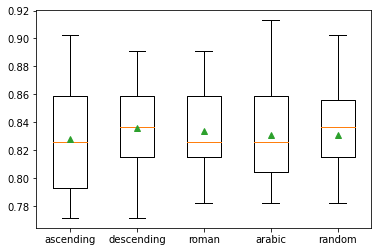

In [ ]:
df1_imput=optimize_IterativeImputer_imputer(Heart_Disease_DF,'num','Clevel + Hung + Switz + VA')

In [ ]:
# Trying to print the max.. but getting an error.. if you can please feel free to solve it.. aim is to print the best score
df1_imput.loc[df1_imput['Mean_Accuracy'] == df1_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
1,Clevel + Hung + Switz + VA,descending,0.836232,0.029957


###**2. Iterative imputation on Cleveland + Hungarian**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,clev+hung,ascending,0.831987,0.044909
1,clev+hung,descending,0.833173,0.046382
2,clev+hung,roman,0.835358,0.039808
3,clev+hung,arabic,0.837015,0.048449
4,clev+hung,random,0.829736,0.040070


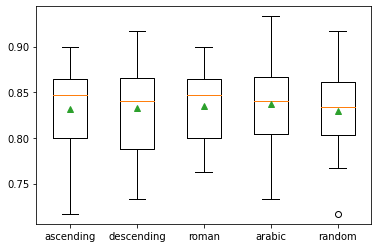

In [ ]:
df2_imput=optimize_IterativeImputer_imputer(Clev_hung_df,'num','clev+hung')

In [ ]:
df2_imput.loc[df2_imput['Mean_Accuracy'] == df2_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
3,clev+hung,arabic,0.837015,0.048449


###**3. Iterative imputation on Cleveland + Switzerland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Clev+Switz,ascending,0.856792,0.058223
1,Clev+Switz,descending,0.855205,0.059692
2,Clev+Switz,roman,0.849705,0.056446
3,Clev+Switz,arabic,0.855186,0.058962
4,Clev+Switz,random,0.848948,0.057877


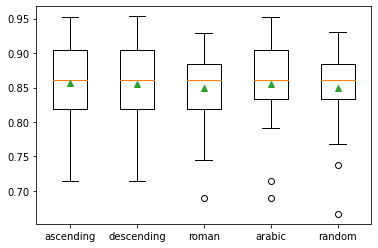

In [ ]:
df3_imput = optimize_IterativeImputer_imputer(Clev_switz_df,'num','Clev+Switz')

In [ ]:
df3_imput.loc[df3_imput['Mean_Accuracy'] == df3_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Clev+Switz,ascending,0.856792,0.058223


###**4. Iterative imputation on Cleveland + Hungarian + Switzerland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Cleve+Hung+Switz,ascending,0.851389,0.033285
1,Cleve+Hung+Switz,descending,0.850000,0.031753
2,Cleve+Hung+Switz,roman,0.852315,0.030320
3,Cleve+Hung+Switz,arabic,0.850000,0.035573
4,Cleve+Hung+Switz,random,0.847685,0.033923


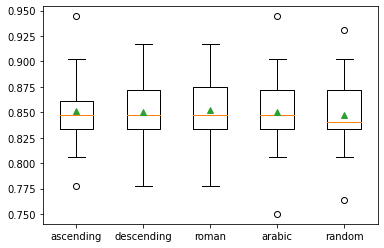

In [ ]:
df4_imput=optimize_IterativeImputer_imputer(Clev_hung_switz_df,'num','Cleve+Hung+Switz')

In [ ]:
df4_imput.loc[df4_imput['Mean_Accuracy'] == df4_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
2,Cleve+Hung+Switz,roman,0.852315,0.03032


###**5. Iterative imputation on Cleveland**

,Name,ImputationOrder,Mean_Accuracy,std_Dev
0,Cleveland,ascending,0.823978,0.051942
1,Cleveland,descending,0.827419,0.055070
2,Cleveland,roman,0.820717,0.060407
3,Cleveland,arabic,0.827240,0.055931
4,Cleveland,random,0.833943,0.048287


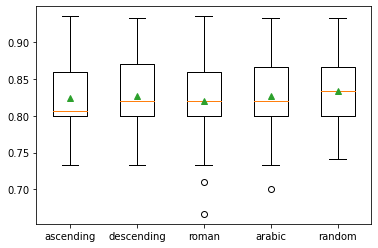

In [ ]:
df5_imput=optimize_IterativeImputer_imputer(cleveland_df,'num','Cleveland')

In [ ]:
df5_imput.loc[df5_imput['Mean_Accuracy'] == df5_imput['Mean_Accuracy'].max()] 

,Name,ImputationOrder,Mean_Accuracy,std_Dev
4,Cleveland,random,0.833943,0.048287


## **Final KNN Imputation results**

---



####**Printing a Dataframe for KNN imputer results**

In [ ]:
df1_max = df1.loc[df1.sort_values(by='K', ascending=False)['MeanAccuracy'] == df1.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df2_max = df2.loc[df2.sort_values(by='K', ascending=False)['MeanAccuracy'] == df2.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df3_max  = df3.loc[df3.sort_values(by='K', ascending=False)['MeanAccuracy'] == df3.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df4_max  = df4.loc[df4.sort_values(by='K', ascending=False)['MeanAccuracy'] == df4.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df5_max  = df5.loc[df5.sort_values(by='K', ascending=False)['MeanAccuracy'] == df5.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 

Optimum_df = pd.concat([df1_max,df2_max,df3_max,df4_max,df5_max])
Optimum_df.reset_index().sort_values(by='MeanAccuracy', ascending=False, na_position='first')

,index,Name,K,MeanAccuracy,stdAccuracy
2,14,cleveland+switzerland,29.0,0.861443,0.053701
3,1,cleveland+hungarian+switzerland,3.0,0.857870,0.027704
1,1,cleveland+hungarian,3.0,0.843682,0.042083
0,18,cleveland+hungarian+switzerland+va,37.0,0.838043,0.031170
4,17,cleveland,35.0,0.829570,0.048719


####**Printing a Dataframe for Iterative imputer results**

In [ ]:
df1_imput_max = df1_imput.loc[df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df2_imput_max = df2_imput.loc[df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df3_imput_max  = df3_imput.loc[df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df4_imput_max  = df4_imput.loc[df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df5_imput_max  = df5_imput.loc[df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 

Optimum_df_imput = pd.concat([df1_imput_max,df2_imput_max,df3_imput_max,df4_imput_max,df5_imput_max])
Optimum_df_imput.reset_index().sort_values(by='Mean_Accuracy', ascending=False, na_position='first')

,index,Name,ImputationOrder,Mean_Accuracy,std_Dev
2,0,Clev+Switz,ascending,0.856792,0.058223
3,2,Cleve+Hung+Switz,roman,0.852315,0.030320
1,3,clev+hung,arabic,0.837015,0.048449
0,1,Clevel + Hung + Switz + VA,descending,0.836232,0.029957
4,4,Cleveland,random,0.833943,0.048287


###**Final Imputed Dataset:** 
Imputation with KNN mean accuracy is higher with smallest std_dev.. so we will select the final imputed dataset Cleveland+Switzerland+Hungarian--- with K=3.

In [ ]:
# function to convert the  imputation results in a dataframe
def Final_Dataset_Prep(data, target , K):
    imputer = KNNImputer(n_neighbors=K, weights='distance', metric='nan_euclidean')
    array = data.values
    X = array[:,:-1]
    trans = MinMaxScaler()
    trans_X = trans.fit_transform(X)   
    X_imputed = imputer.fit_transform(trans_X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)

    data['num'][data.num >0] = 1
    Y_temp = data['num']
    Final_Dataset = pd.concat([d.reset_index(drop=True) for d in [X_imputed_df, Y_temp]], axis=1)
    return Final_Dataset

In [ ]:
# createing the final imputed dataset for the project (combining Cleveland, Hungarian, and Switzerland)
data = Clev_hung_switz_df
target = 'num'
K = 3

Final_DF = Final_Dataset_Prep(data,target,K)

In [ ]:
Final_DF.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.75,0
1,0.795918,1.0,1.000000,0.666667,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.00,1
2,0.795918,1.0,1.000000,0.333333,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.00,1
3,0.183673,1.0,0.666667,0.416667,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.00,0
4,0.265306,0.0,0.333333,0.416667,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.489796,1.0,1.000000,0.400000,0.422886,0.0,0.0,0.711268,1.0,0.295455,0.0,0.333333,1.00,1
96,0.632653,1.0,1.000000,0.250000,0.396352,0.0,1.0,0.577465,1.0,0.431818,0.5,0.333333,1.00,1
97,0.653061,0.0,1.000000,0.583333,0.427861,0.0,1.0,0.683099,0.0,0.590909,0.5,0.666667,1.00,1
98,0.489796,1.0,0.333333,0.450000,0.333333,0.0,0.0,0.690141,0.0,0.386364,0.0,0.333333,0.00,0


In [ ]:
Final_DF.shape

(720, 14)

In [ ]:
#checking for the missing values in the final dataset
final_df_nan = pd.DataFrame(Final_DF.isnull().sum())
final_df_nan

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Missing values:** No missing values in the final dataset

In [ ]:
#checking duplicate rows in final dataset:
dups_final_df=Final_DF.duplicated()
print(dups_final_df.any())
print(Final_DF[dups_final_df])

True
          age  sex        cp  trestbps  ...     slope   ca  thal  num
405  0.428571  0.0  0.333333      0.25  ...  0.134378  0.0   0.0    0

[1 rows x 14 columns]


**Duplicte rows**: there is a one duplicate row so we can remove it.

In [ ]:
# deleting the duplicate rows from the final dataset

In [ ]:
# drops the duplicate and inplace will save changes in the same file
Final_DF.drop_duplicates(inplace=True)
Final_DF.shape

(719, 14)

In [ ]:
Final_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.386401,1.000000,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.750000,0
1,0.795918,1.0,1.000000,0.666667,0.474295,0.000000,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.000000,1
2,0.795918,1.0,1.000000,0.333333,0.379768,0.000000,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.000000,1
3,0.183673,1.0,0.666667,0.416667,0.414594,0.000000,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.000000,0
4,0.265306,0.0,0.333333,0.416667,0.338308,0.000000,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.857143,1.0,1.000000,0.291667,0.000000,0.000000,0.5,0.225352,1.0,0.295455,0.5,0.333333,1.000000,1
716,0.857143,1.0,1.000000,0.500000,0.000000,1.000000,0.0,0.683099,1.0,0.522727,0.5,0.304230,1.000000,1
717,0.897959,1.0,0.666667,0.666667,0.000000,0.328777,1.0,0.380282,0.0,0.477273,0.5,0.666667,0.834796,0
718,0.918367,0.0,0.666667,0.666667,0.000000,0.000000,0.5,0.429577,0.0,0.295455,0.0,0.101401,0.000000,1


In [ ]:
Final_DF.to_csv(r'.\Final_Dataset.csv', index = False, header=True)

In [ ]:
from google.colab import files
Final_DF.to_csv('Final_imputed.csv') 
files.download('Final_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#--------------------**Analyze the  imputed data**--------------------------

##**Descriptive analysis of imputed data**
* shape
* describe()
* correlation matrix using "pearson"
* Output class distribution
* skewness of the attributes 



In [ ]:
#Shape of the Final imputed datatypes
# age -- original data
Final_DF.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
#summary of the statisitcs 
from pandas import set_option
set_option('display.width',100)
pd.set_option('precision',3)
Final_DF.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000,719.000
mean,0.488,0.740,0.727,0.432,0.340,0.105,0.285,0.567,0.338,0.385,0.314,0.192,0.496,0.501
std,0.188,0.439,0.318,0.154,0.179,0.299,0.417,0.181,0.473,0.121,0.272,0.246,0.430,0.500
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.347,0.000,0.333,0.333,0.303,0.000,0.000,0.437,0.000,0.295,0.000,0.000,0.000,0.000
50%,0.510,1.000,1.000,0.417,0.375,0.000,0.000,0.577,0.000,0.318,0.500,0.104,0.565,1.000
75%,0.612,1.000,1.000,0.500,0.446,0.000,0.500,0.704,1.000,0.466,0.500,0.333,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
#correlation between the attributes
from pandas import set_option
#set_option('display.width')
pd.set_option('precision',3)

print(Final_DF.corr(method='pearson'))

            age    sex         cp  trestbps  ...  slope     ca   thal    num
age       1.000 -0.028  1.594e-01     0.253  ...  0.199  0.386  0.187  0.243
sex      -0.028  1.000  1.525e-01    -0.012  ...  0.080  0.145  0.395  0.296
cp        0.159  0.152  1.000e+00     0.003  ...  0.268  0.248  0.388  0.496
trestbps  0.253 -0.012  2.506e-03     1.000  ...  0.061  0.118  0.105  0.099
chol     -0.096 -0.197 -1.706e-01     0.080  ... -0.092 -0.036 -0.147 -0.280
fbs       0.170  0.032 -2.164e-04     0.129  ...  0.062  0.186  0.063  0.066
restecg   0.234 -0.047  1.142e-02     0.095  ...  0.062  0.189 -0.044  0.069
thalach  -0.336 -0.147 -3.421e-01    -0.114  ... -0.390 -0.268 -0.355 -0.405
exang     0.141  0.155  4.230e-01     0.126  ...  0.360  0.209  0.392  0.461
oldpeak   0.223  0.067  2.407e-01     0.166  ...  0.424  0.308  0.298  0.374
slope     0.199  0.080  2.679e-01     0.061  ...  1.000  0.160  0.345  0.380
ca        0.386  0.145  2.482e-01     0.118  ...  0.160  1.000  0.299  0.428

In [ ]:
#class distribution to check balanced between two classes
print(Final_DF.groupby('num').size())

num
0    359
1    360
dtype: int64


data is balanced in this dataset

In [ ]:
#skew of univariate distribution
skew=Final_DF.skew()
print(skew)

age        -0.120
sex        -1.096
cp         -0.735
trestbps    0.663
chol       -0.635
fbs         2.607
restecg     0.945
thalach    -0.334
exang       0.687
oldpeak     1.230
slope       0.392
ca          1.455
thal       -0.028
num        -0.003
dtype: float64


#**Data visulization:**

*   Unimodal Data visulization
    * Histogram 
    * Density curve
    * Box plot
*   Multimodal Data visualization
    * Scatter plot
    * Correlation matrix

In [ ]:
#Histogram
def plot_hist(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    
    
    sns.histplot(
        df,
        x=variable, hue="num",
        multiple="stack",
        palette="gist_rainbow",
        edgecolor=".3",
        linewidth=.9,
        #log_scale=True,
    )

    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

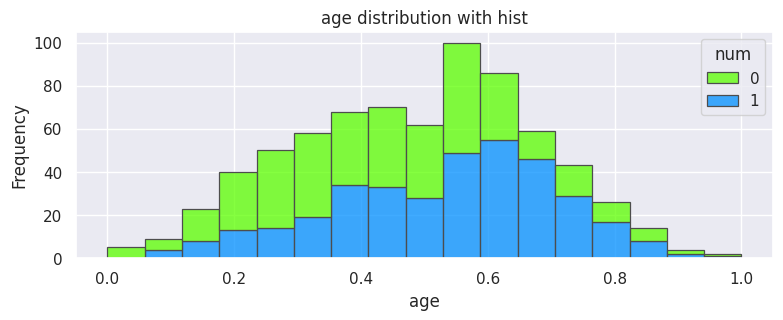

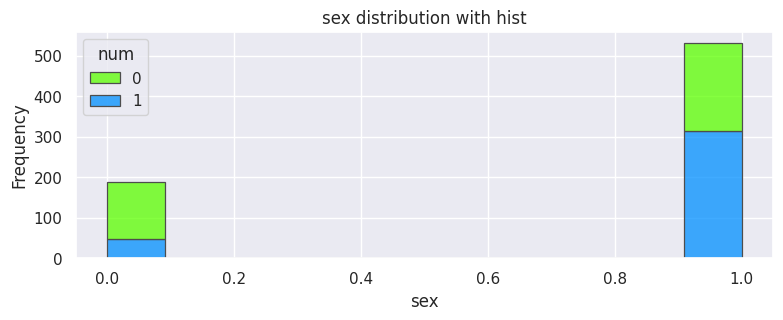

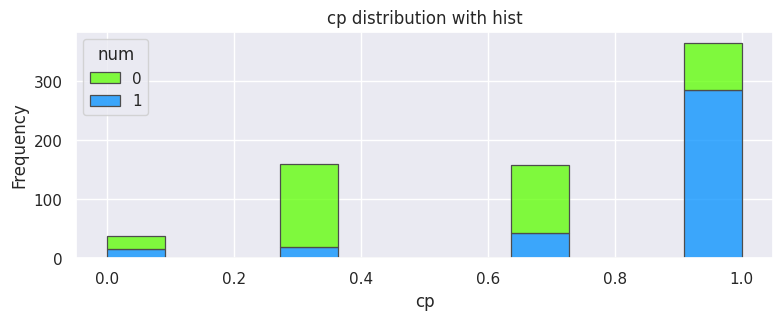

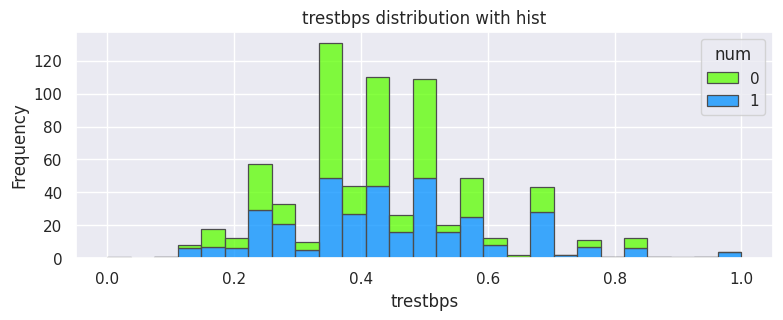

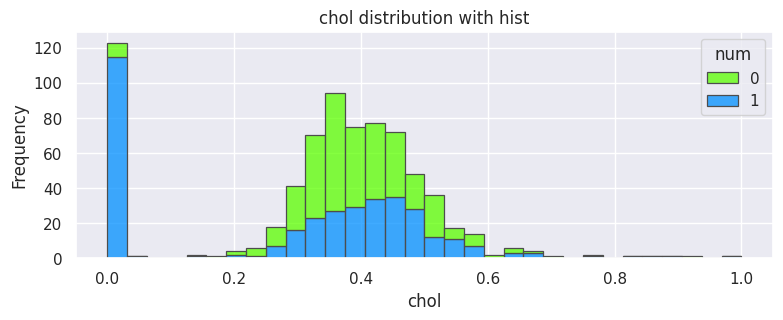

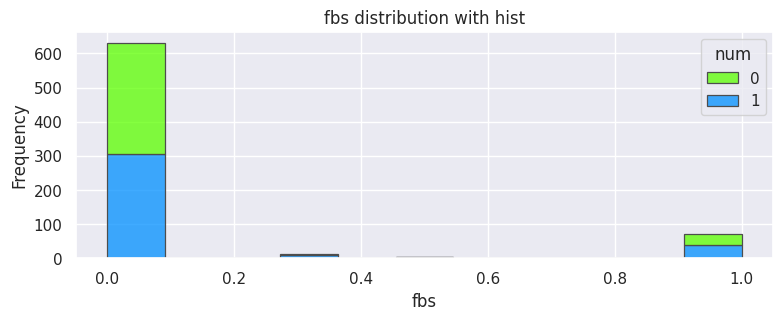

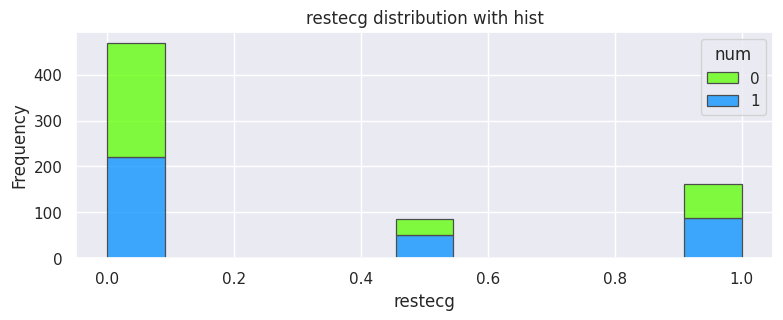

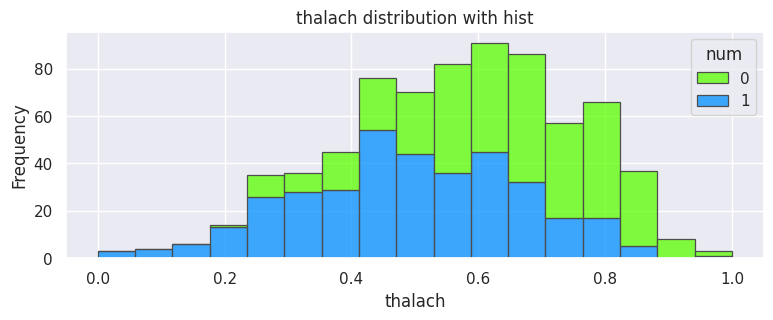

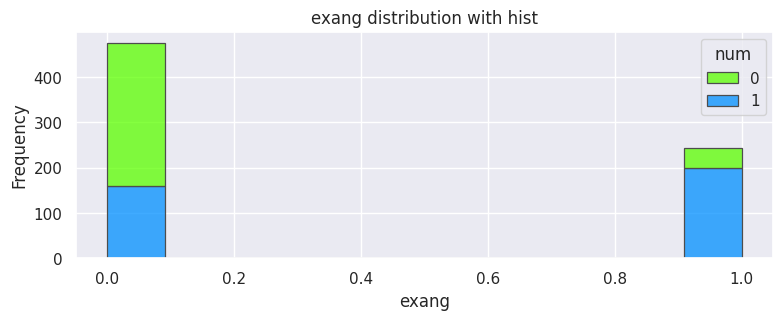

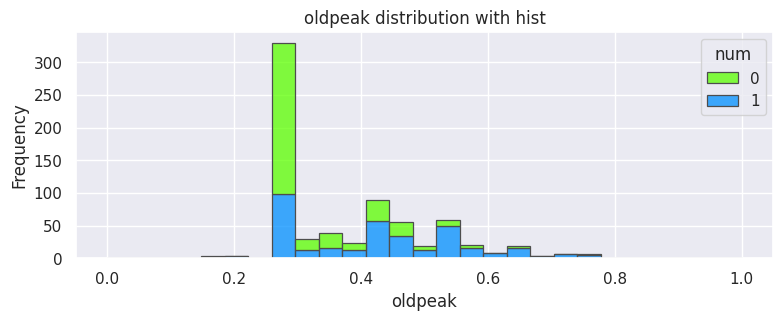

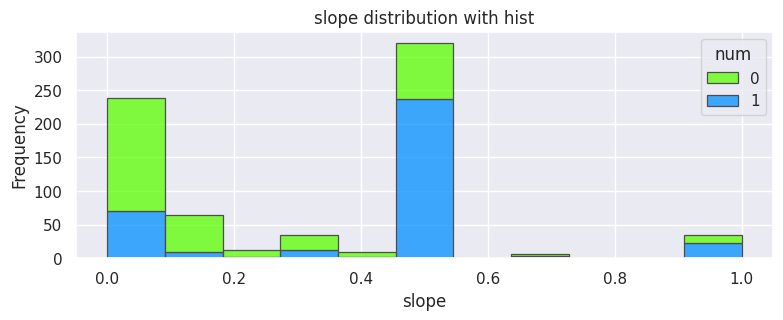

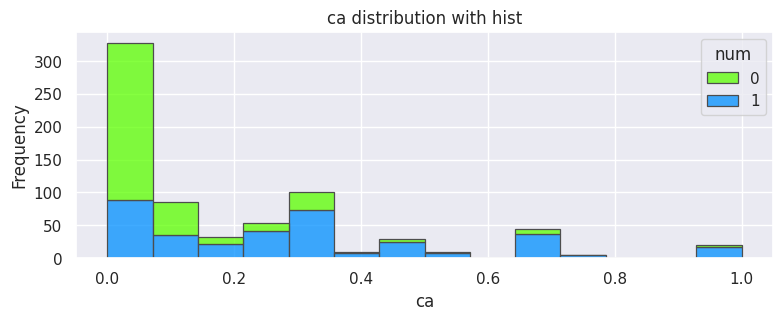

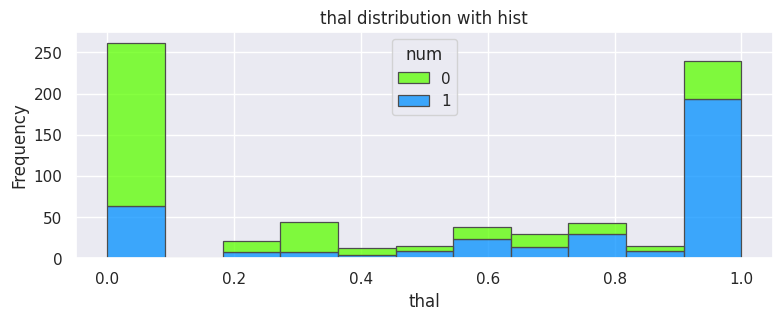

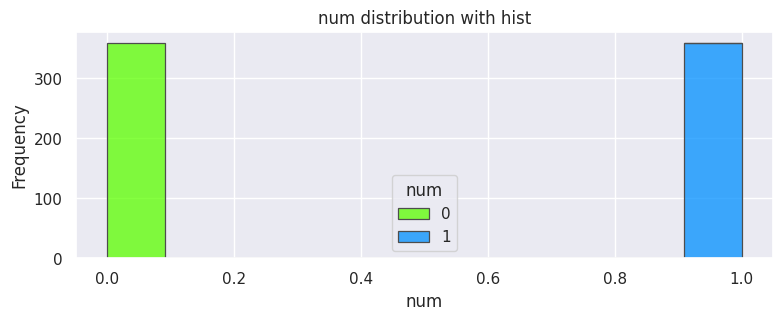

In [ ]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_hist(n,Final_DF)

In [ ]:
def plot_distribution(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    #plt.hist(dataset[variable], bins = 50)
    sns.distplot(df[variable], rug=True, hist=True)
    #sns.distplot(Final_DF[Final_DF['num']==1][variable], rug=True, hist=True, label='1')
    #sns.distplot(Final_DF[Final_DF['num']==0][variable], rug=True, hist=True, label='0')
    plt.legend()
#plt.title('Density plot of age by sex');
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()



No handles with labels found to put in legend.


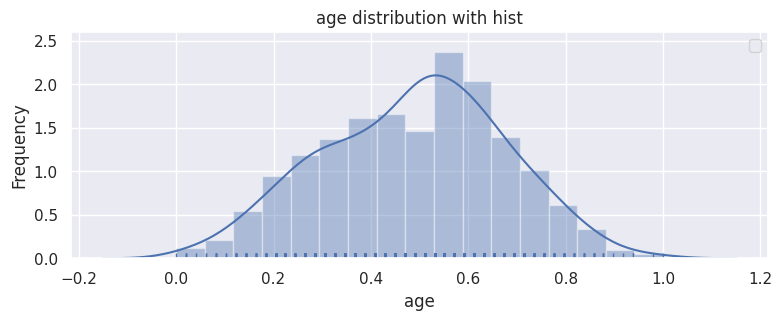

No handles with labels found to put in legend.


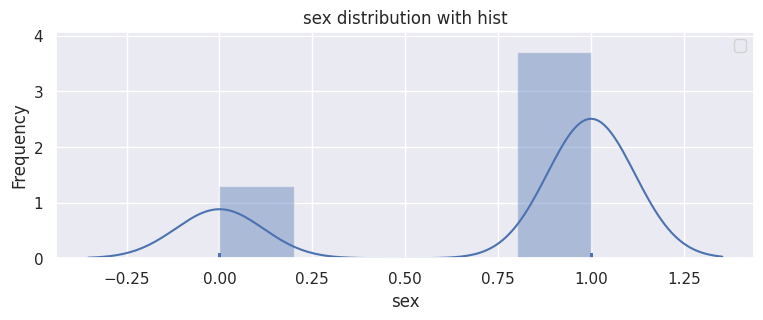

No handles with labels found to put in legend.


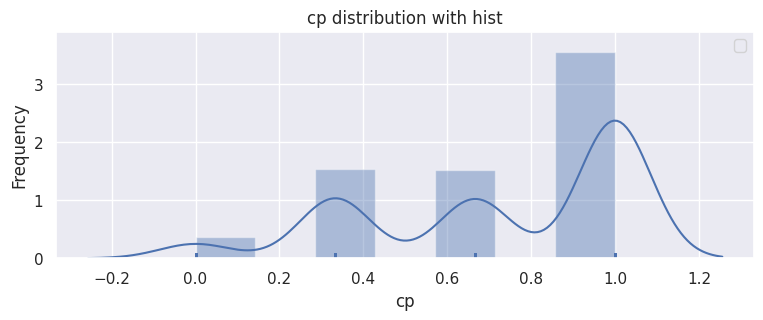

No handles with labels found to put in legend.


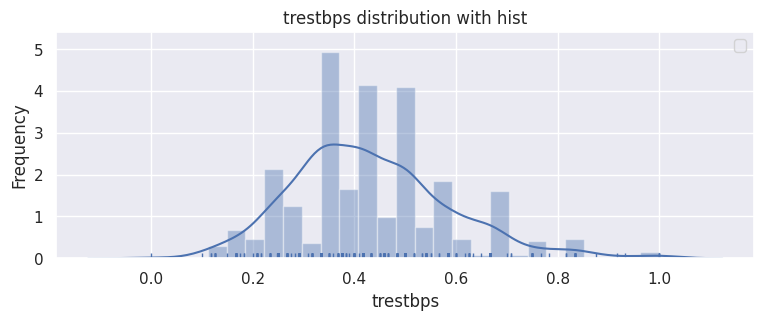

No handles with labels found to put in legend.


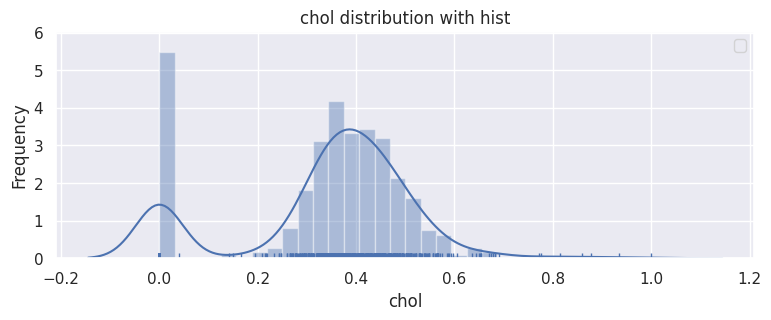

No handles with labels found to put in legend.


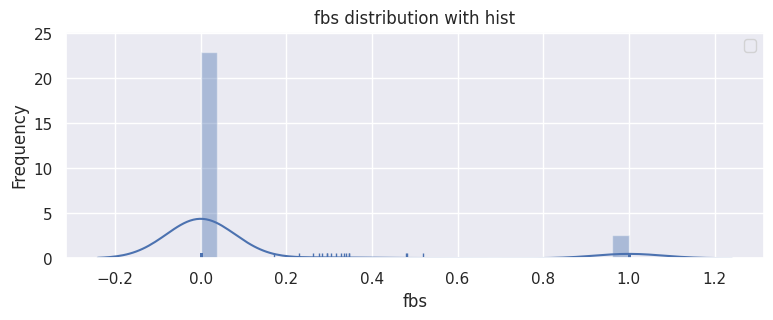

No handles with labels found to put in legend.


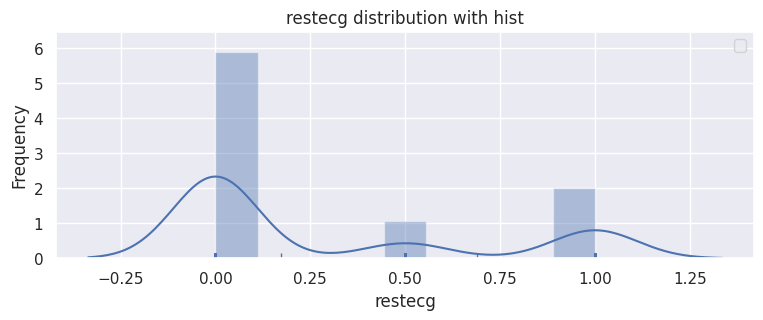

No handles with labels found to put in legend.


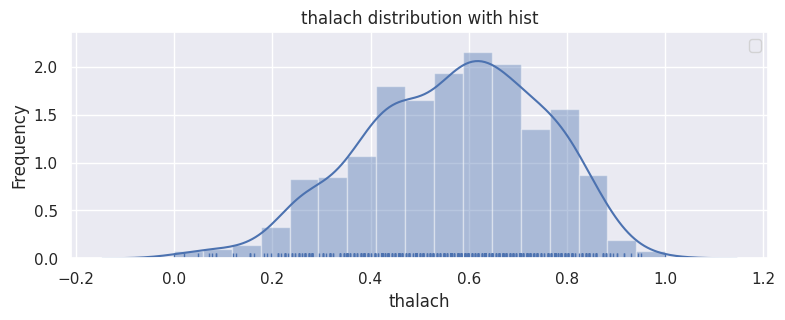

No handles with labels found to put in legend.


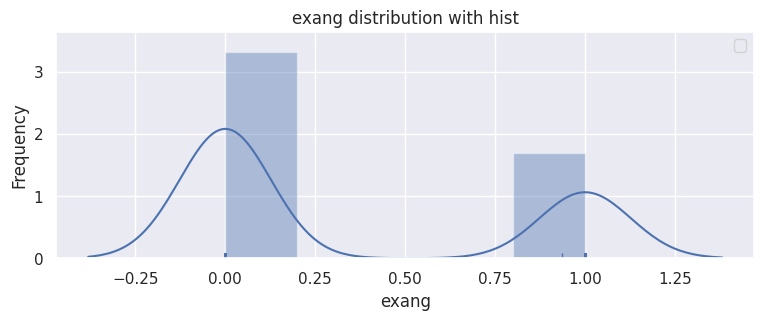

No handles with labels found to put in legend.


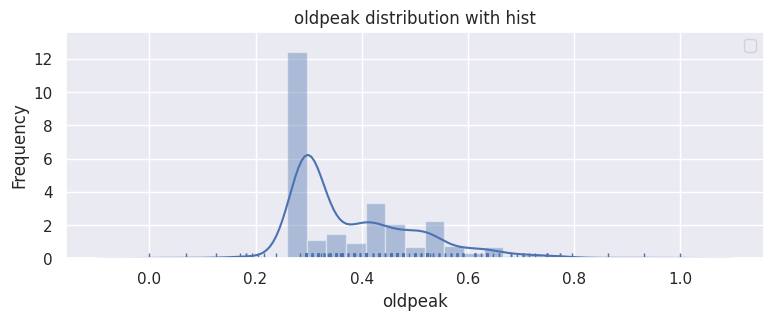

No handles with labels found to put in legend.


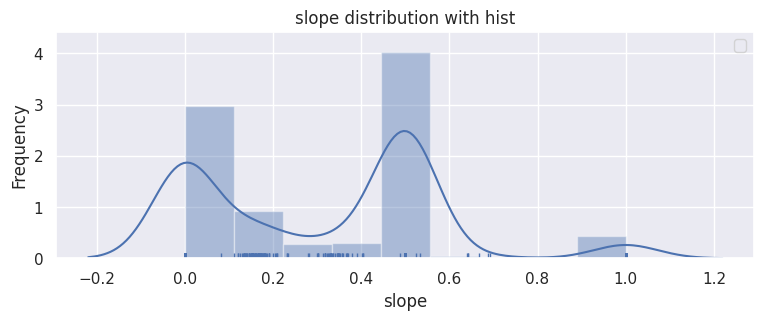

No handles with labels found to put in legend.


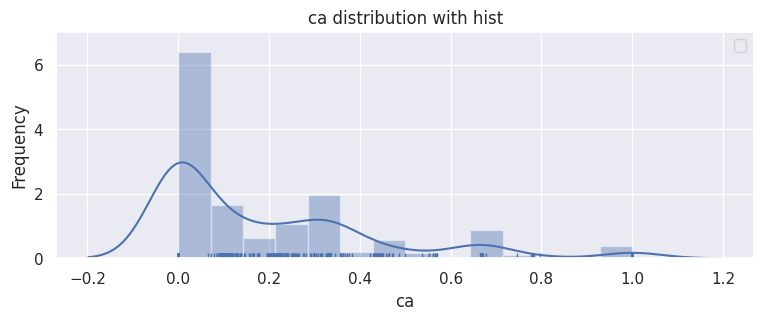

No handles with labels found to put in legend.


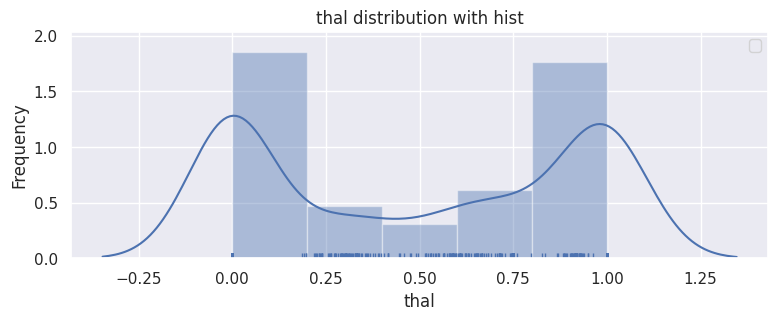

No handles with labels found to put in legend.


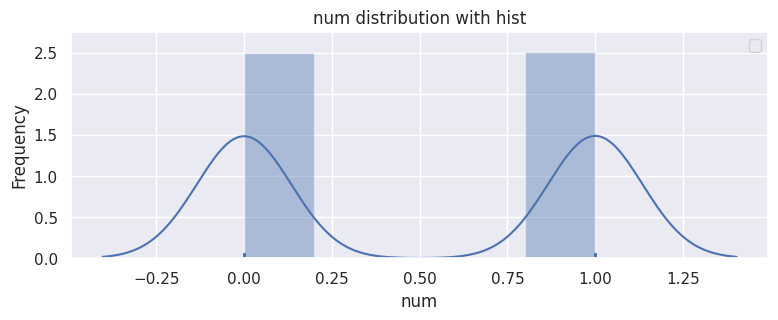

In [ ]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_distribution(n,Final_DF)

### Data is not normal, but it is balanced from the num.Hence, before modeling we need to rescale or transform the dataset 

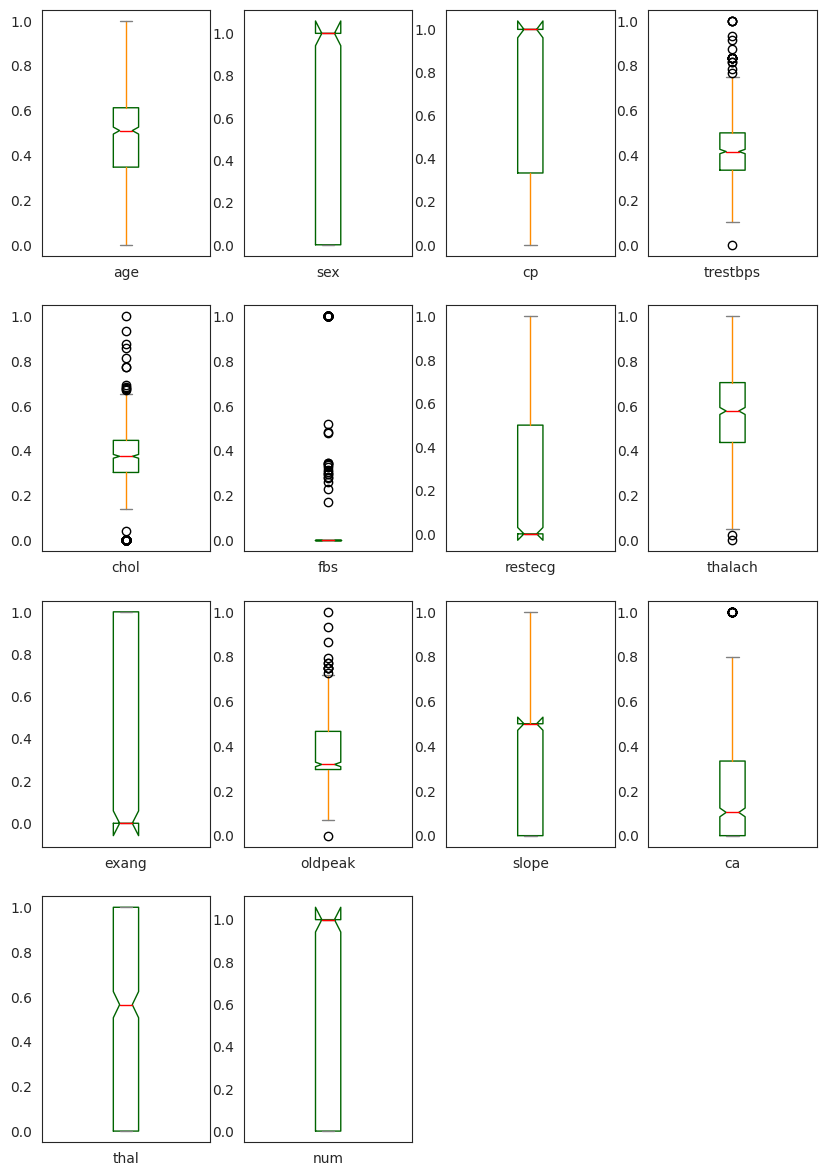

In [ ]:
#Box plots
color1 = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "red",
        "caps": "Gray",
        }
pyplot.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':100})
ax = Final_DF.plot(kind='box',color=color1, subplots=True ,layout=(4,4),sharex=False, sharey=False , notch = True)
pyplot.xticks(fontsize = 16);
pyplot.yticks(fontsize = 4);
pyplot.show()
def boxplot_Matrix(labels, data):
    rows_list = []
    df = plt.boxplot(data,notch = True,labels = labels )
    for i in range(len(labels)):
        dict_Boxplot = {}
        dict_Boxplot['label'] = labels[i]
        dict_Boxplot['lower_whisker'] = df['whiskers'][i*2].get_ydata()[1]
        dict_Boxplot['lower_quartile'] = df['boxes'][i].get_ydata()[1]
        dict_Boxplot['median'] = df['medians'][i].get_ydata()[1]
        dict_Boxplot['upper_quartile'] = df['boxes'][i].get_ydata()[2]
        dict_Boxplot['upper_whisker'] = df['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict_Boxplot)

    return pd.DataFrame(rows_list)


### **Multimondal Data visualization**

<Figure size 4320x4320 with 0 Axes>

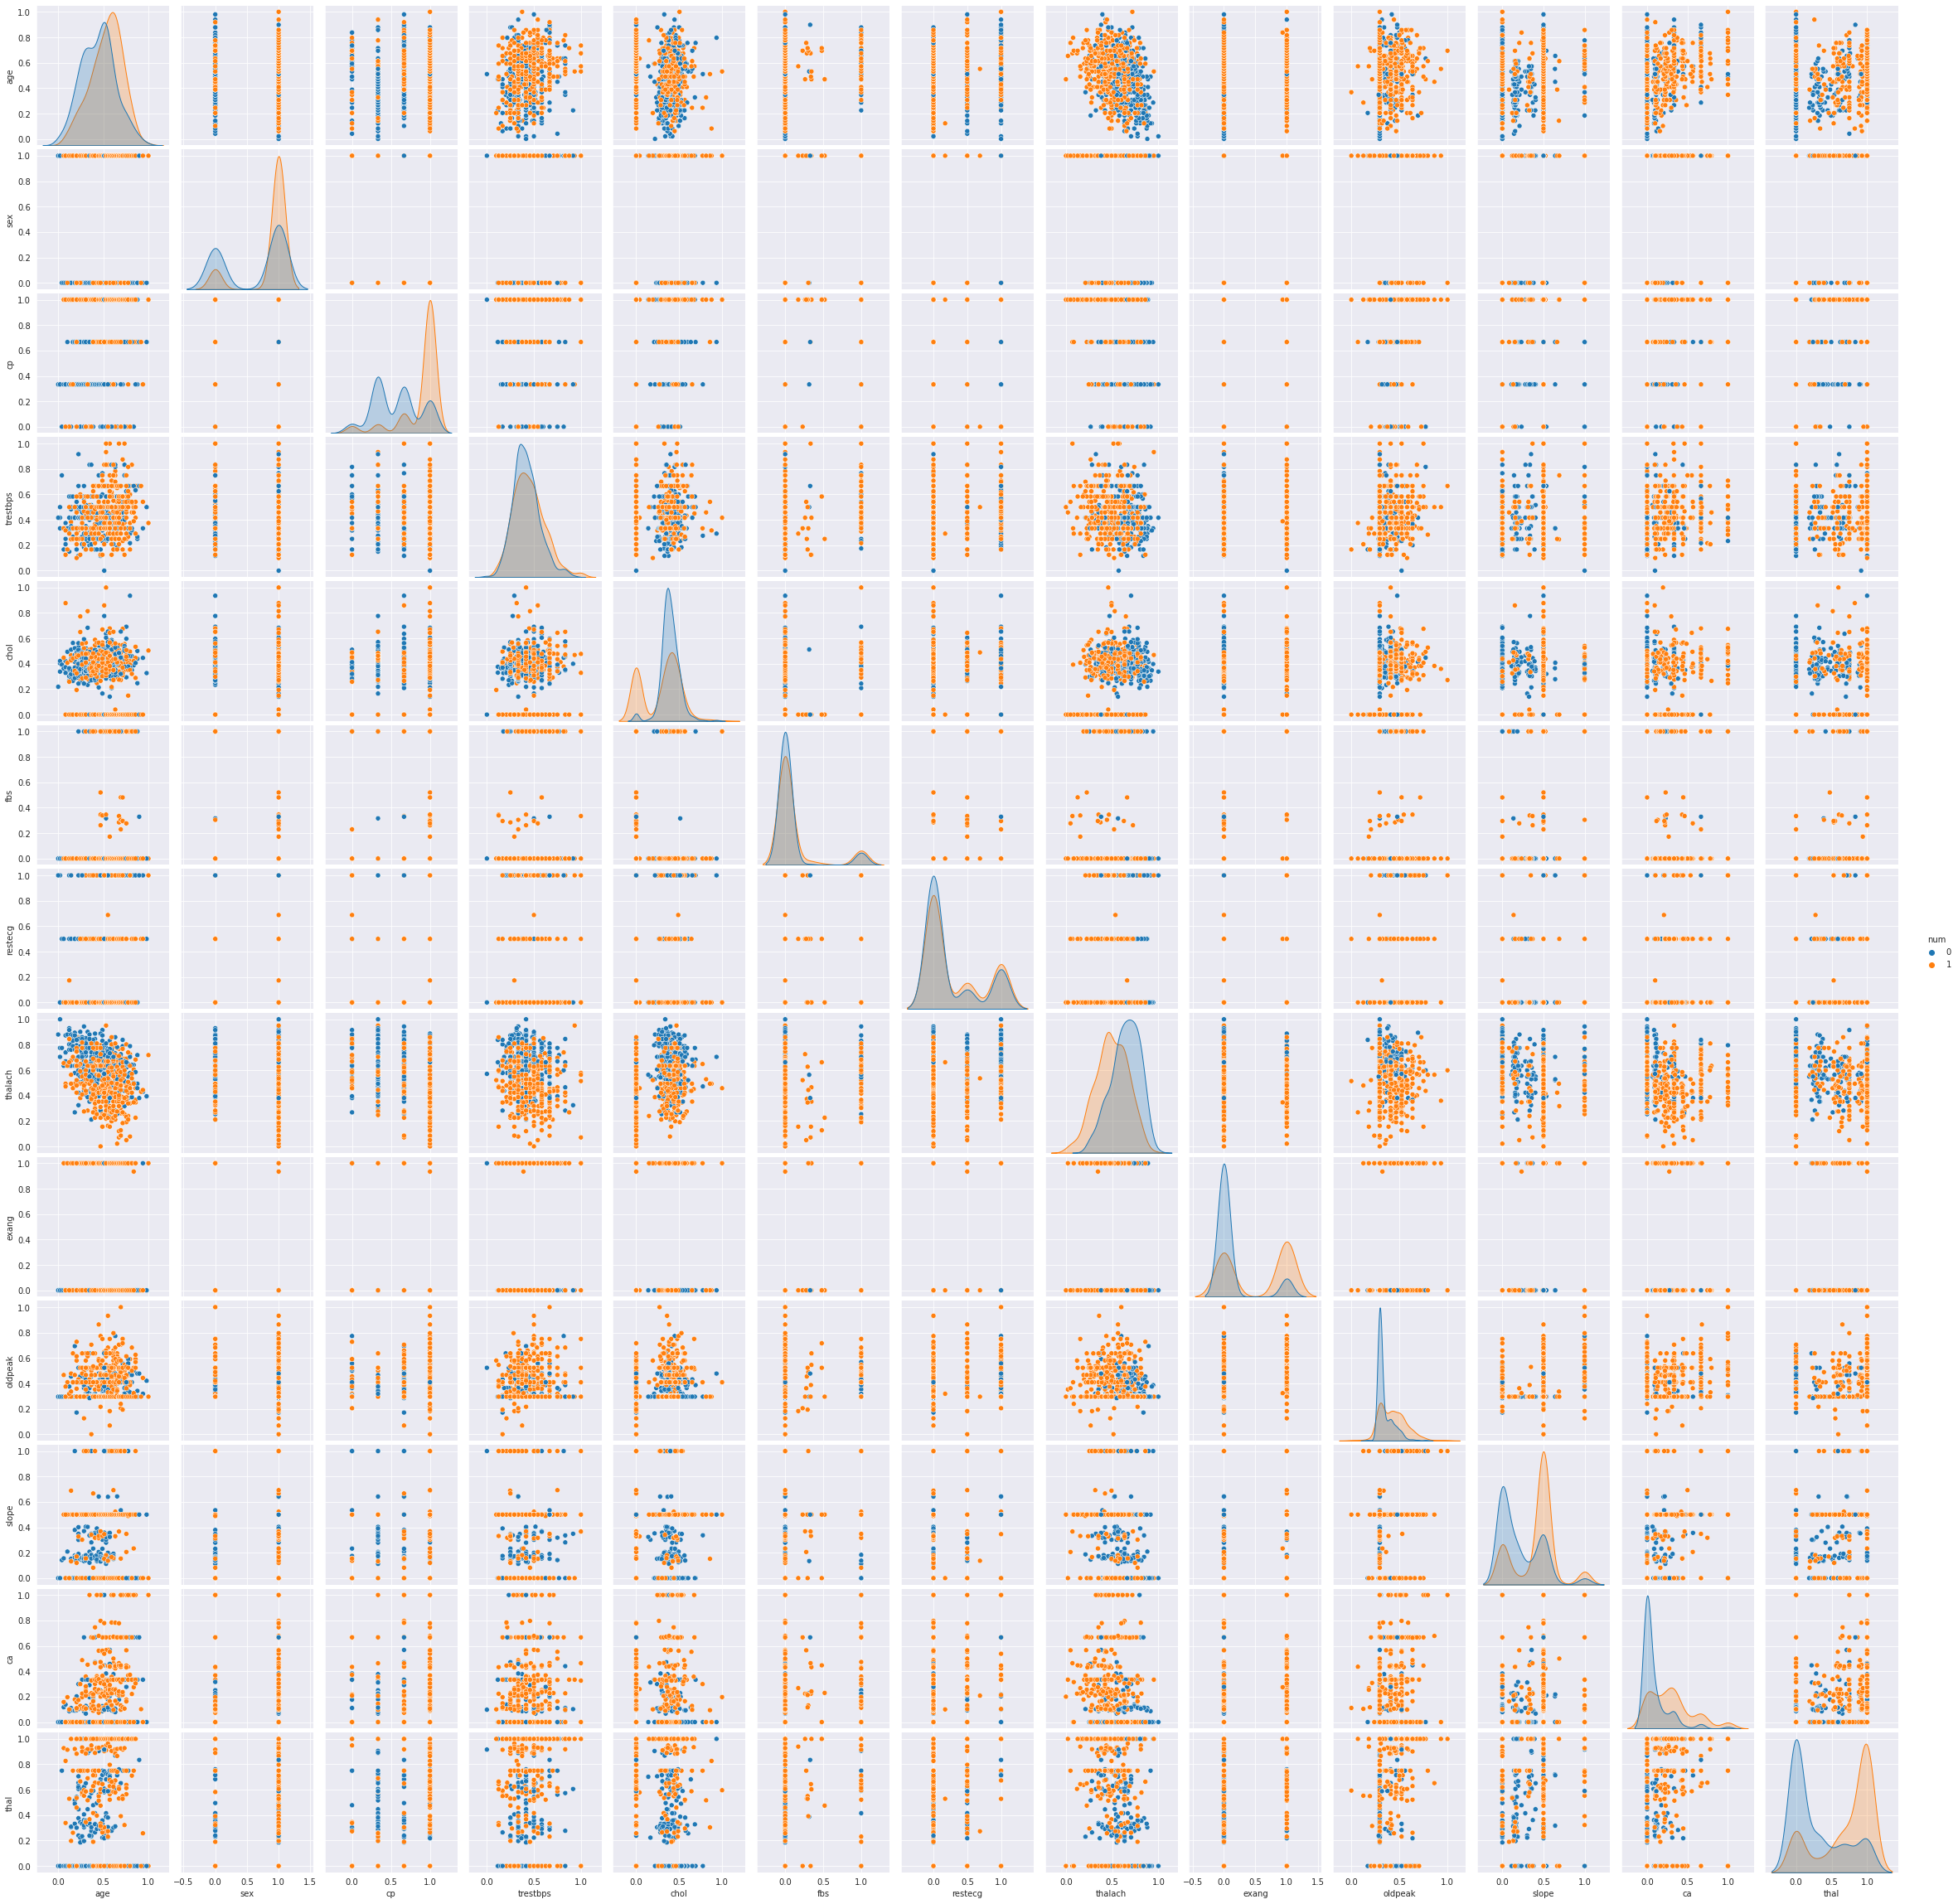

In [ ]:
#scatter plot matrix
#orange--- num=1, blue----num=0
plt.figure(figsize=(60,60))
sns.set_style('darkgrid')
sns.pairplot(Final_DF, hue='num')

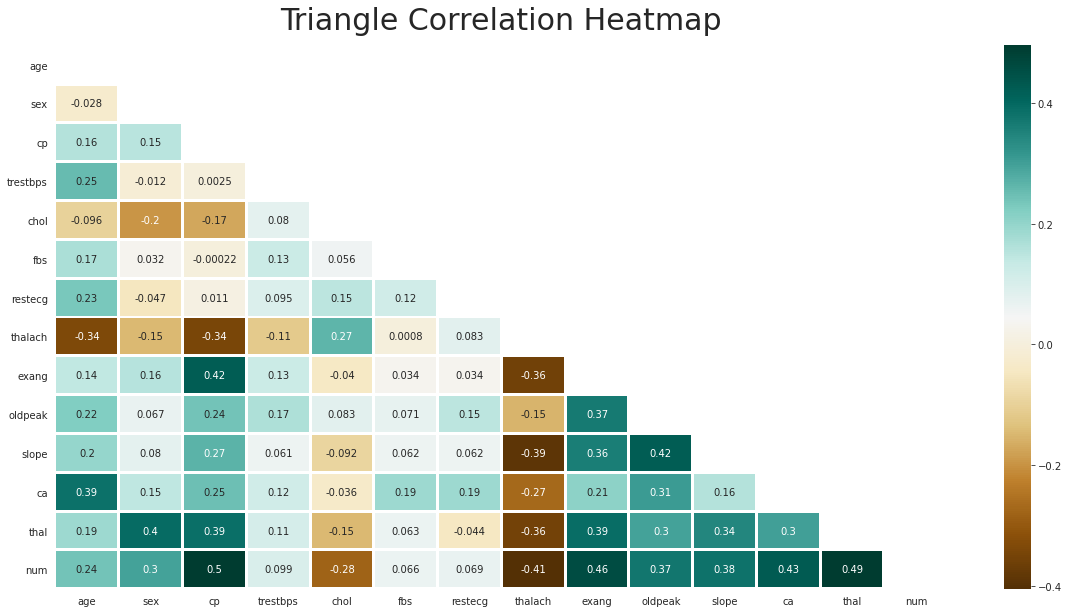

In [ ]:
#correlation matrix
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(Final_DF.corr(), dtype=np.bool))
heatmap = sns.heatmap(Final_DF.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

# **Model Selection**
##**Baseline Mode using train-test split**
###**Spot check following algorithm**


1.   LogisticRegression
2.   KNeighborsClassifier
3.   Support Vector Machine
4.   Linear Discriminant Analysis 
5.   DecisionTreeClassifier
6.   Gaussian Naive Bayes
7.   Random Forest Classifier 
8.   Ada Boosting Classifier
9.   XG Boosting Classifier
10.  Bagging Classifier


In [11]:
#Libaries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

#### **Function to calculate and print the different performance metrics on predicted values**

In [2]:
#function to measure and print different performance metrics
def Print_Metrics(best_model,y_test,X_test,y_predict_test,X_train,y_train,modelName):
    print('\nModel performance on the test data set:')

    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    #accuracy_train = best_model.score(X_train, y_train)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    #accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
        
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
               ["Test accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    
    result = {
        "logloss" : logloss_test,
        "Test accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }

    data = [[modelName, logloss_test,accuracy_test,precision_test,F1_test,r2_test,auc_test]]
    df_result = pd.DataFrame(data, columns = ['ModelName', 'logloss','Test accuracy','precision', 'F1', 'r2', 'AUC'])
    print(tabulate(table, header, tablefmt="fancy_grid"))
    return df_result

####**Function to evalute the prediction performance using ROC curve**

In [3]:
# function to plot ROC curve
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='best')
    plt.show()
    
    return roc_auc

#### **Function for confusion matrix**

In [4]:
#function to print confusion matrix
def Confusion_Matrix(y_test, y_pred):
    print("Confusion Matrix : ",metrics.confusion_matrix(y_test, y_pred))
    clf_confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = clf_confusion[1, 1]
    TN = clf_confusion[0, 0]
    FP = clf_confusion[0, 1]
    FN = clf_confusion[1, 0]

    print("Classification Accuracy : ",(TP + TN) / float(TP + TN + FP + FN))
    print("classification_error : ",(FP + FN) / float(TP + TN + FP + FN))
    print("sensitivity : ",TP / float(FN + TP))
    print("specificity : ",TN / (TN + FP))
    print("false_positive_rate : ",FP / float(TN + FP))
    print("precision : ",TP / float(TP + FP))

####**Function to plot importand features for each model during spot check**

In [5]:
# Function to plot important features
def imp_feature(model):
    X_features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
    feature_imp = pd.Series(model.feature_importances_,index=X_features).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

In [6]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv

Saving new_Imputed_knn.csv to new_Imputed_knn.csv


In [8]:
import io
Final_DF= pd.read_csv(io.BytesIO(uploaded['new_Imputed_knn.csv']))
Final_DF = Final_DF.iloc[: , 1:]
Final_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.541667,0.285714,1.000000,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.750000,0
1,0.795918,1.0,1.000000,0.666667,0.388031,0.000000,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.000000,1
2,0.795918,1.0,1.000000,0.333333,0.277992,0.000000,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.000000,1
3,0.183673,1.0,0.666667,0.416667,0.318533,0.000000,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.000000,0
4,0.265306,0.0,0.333333,0.416667,0.229730,0.000000,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.857143,1.0,1.000000,0.291667,0.340046,0.000000,0.5,0.225352,1.0,0.295455,0.5,0.350985,1.000000,1
716,0.857143,1.0,1.000000,0.500000,0.383377,1.000000,0.0,0.683099,1.0,0.522727,0.5,0.330718,1.000000,1
717,0.897959,1.0,0.666667,0.666667,0.309130,0.216794,1.0,0.380282,0.0,0.477273,0.5,0.666667,0.632318,0
718,0.918367,0.0,0.666667,0.666667,0.354750,0.000000,0.5,0.429577,0.0,0.295455,0.0,0.140394,0.000000,1


####**Train- Test split**

In [9]:
#splitting the data into 70% train - 30% test
from sklearn.model_selection import train_test_split
y=Final_DF['num'] 
X=Final_DF[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

##**Model Selection**


1.   **Fit the model**
2.   **Predict the values**
3.   **Calculate different metrics:** logloss, accuracy, precision, F1, r2, and AUC     
4.   **Plot ROC curve**
5.   **Confusion matrix:** Classification Accuracy, classification_error, sensitivity, specificity, false_positive_rate, precision 
6.   **Important features for tree classifiers**

===========================Logistic Regression : LR================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.07633  │
├───────────────┼──────────┤
│ Test accuracy │ 0.824074 │
├───────────────┼──────────┤
│ precision     │ 0.834951 │
├───────────────┼──────────┤
│ F1            │ 0.819048 │
├───────────────┼──────────┤
│ r2            │ 0.296236 │
├───────────────┼──────────┤
│ AUC           │ 0.823888 │
╘═══════════════╧══════════╛



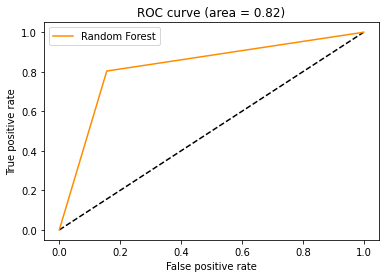

ROC for base model : Logistic Regression : LR : 0.8238875075023578

Confusion Matrix : 
Confusion Matrix :  [[92 17]
 [21 86]]
Classification Accuracy :  0.8240740740740741
classification_error :  0.17592592592592593
sensitivity :  0.8037383177570093
specificity :  0.8440366972477065
false_positive_rate :  0.1559633027522936
precision :  0.8349514563106796
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Imp Features : 

===========================Linear Discriminant Analysis : LDA ================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.91642  │
├───────────────┼──────────┤
│ Test accuracy │ 0.828704 │
├───────────────┼──────────┤
│ preci

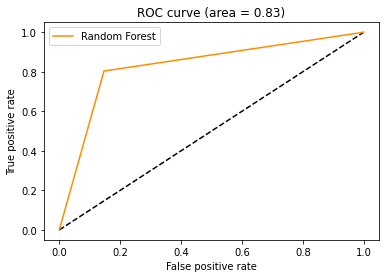

ROC for base model : Linear Discriminant Analysis : LDA  : 0.8284746634656606

Confusion Matrix : 
Confusion Matrix :  [[93 16]
 [21 86]]
Classification Accuracy :  0.8287037037037037
classification_error :  0.1712962962962963
sensitivity :  0.8037383177570093
specificity :  0.8532110091743119
false_positive_rate :  0.14678899082568808
precision :  0.8431372549019608
{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}

Imp Features : 

===========================KNN================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.07632  │
├───────────────┼──────────┤
│ Test accuracy │ 0.824074 │
├───────────────┼──────────┤
│ precision     │ 0.848485 │
├───────────────┼──────────┤
│ F1            │ 0.815534 │
├───────────────┼──────────┤
│ r2            │ 0.296236 │
├───────────────┼──────────┤
│ AUC         

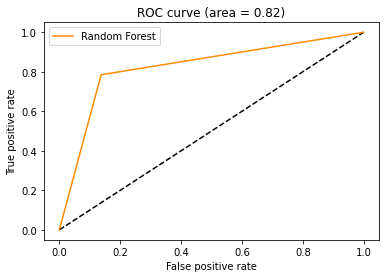

ROC for base model : KNN : 0.82371602503644

Confusion Matrix : 
Confusion Matrix :  [[94 15]
 [23 84]]
Classification Accuracy :  0.8240740740740741
classification_error :  0.17592592592592593
sensitivity :  0.7850467289719626
specificity :  0.8623853211009175
false_positive_rate :  0.13761467889908258
precision :  0.8484848484848485
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Imp Features : 

===========================Decision Tree Classifier================================

Model performance on the test data set:
╒═══════════════╤═══════════╕
│ Metric        │      Test │
╞═══════════════╪═══════════╡
│ logloss       │ 8.31497   │
├───────────────┼───────────┤
│ Test accuracy │ 0.759259  │
├───────────────┼───────────┤
│ precision     │ 0.777778  │
├───────────────┼───────────┤
│ F1            │ 0.747573  │
├───────────────┼───────────┤
│ r2            │ 0.0369545 │
├──────────

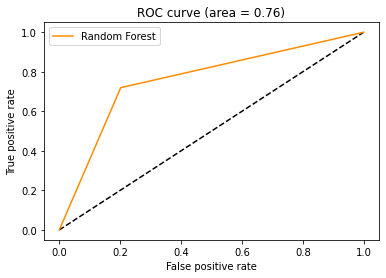

No handles with labels found to put in legend.


ROC for base model : Decision Tree Classifier : 0.758895652919489

Confusion Matrix : 
Confusion Matrix :  [[87 22]
 [30 77]]
Classification Accuracy :  0.7592592592592593
classification_error :  0.24074074074074073
sensitivity :  0.719626168224299
specificity :  0.7981651376146789
false_positive_rate :  0.2018348623853211
precision :  0.7777777777777778
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Imp Features : 


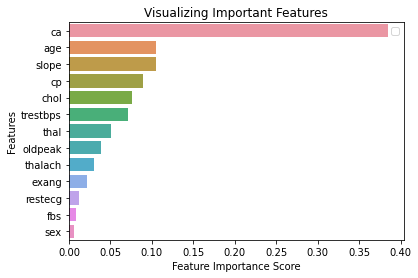

===========================GaussianNB : NB================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.07631  │
├───────────────┼──────────┤
│ Test accuracy │ 0.824074 │
├───────────────┼──────────┤
│ precision     │ 0.863158 │
├───────────────┼──────────┤
│ F1            │ 0.811881 │
├───────────────┼──────────┤
│ r2            │ 0.296236 │
├───────────────┼──────────┤
│ AUC           │ 0.823545 │
╘═══════════════╧══════════╛



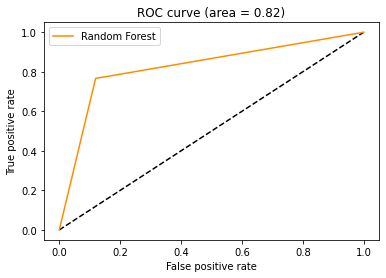

ROC for base model : GaussianNB : NB : 0.8235445425705221

Confusion Matrix : 
Confusion Matrix :  [[96 13]
 [25 82]]
Classification Accuracy :  0.8240740740740741
classification_error :  0.17592592592592593
sensitivity :  0.7663551401869159
specificity :  0.8807339449541285
false_positive_rate :  0.11926605504587157
precision :  0.8631578947368421
{'priors': None, 'var_smoothing': 1e-09}

Imp Features : 

===========================SVM================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.826923 │
├───────────────┼──────────┤
│ F1            │ 0.815166 │
├───────────────┼──────────┤
│ r2            │ 0.277716 │
├───────────────┼──────────┤
│ AUC           │ 0.8193   │
╘═══════════════╧══════════╛



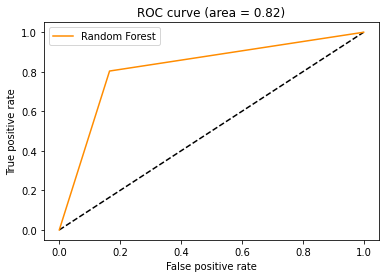

ROC for base model : SVM : 0.8193003515390551

Confusion Matrix : 
Confusion Matrix :  [[91 18]
 [21 86]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8037383177570093
specificity :  0.8348623853211009
false_positive_rate :  0.1651376146788991
precision :  0.8269230769230769
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Imp Features : 

===========================Random Forest Classifier : RFC================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.27681  │
├───────────────┼──────────┤
│ Test accuracy │ 0.847222 │
├───────────────┼──────────┤
│ precision     │ 0.862745 │
├

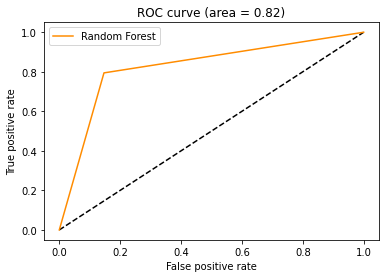

No handles with labels found to put in legend.


ROC for base model : Random Forest Classifier : RFC : 0.8238017662693989

Confusion Matrix : 
Confusion Matrix :  [[95 14]
 [19 88]]
Classification Accuracy :  0.8472222222222222
classification_error :  0.1527777777777778
sensitivity :  0.822429906542056
specificity :  0.8715596330275229
false_positive_rate :  0.12844036697247707
precision :  0.8627450980392157
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Imp Features : 


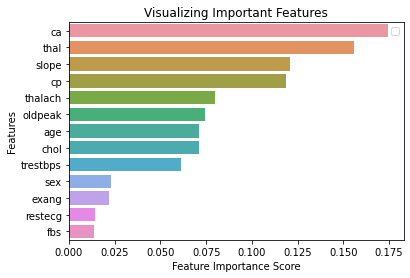

===========================Ada Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.91641  │
├───────────────┼──────────┤
│ Test accuracy │ 0.828704 │
├───────────────┼──────────┤
│ precision     │ 0.864583 │
├───────────────┼──────────┤
│ F1            │ 0.817734 │
├───────────────┼──────────┤
│ r2            │ 0.314756 │
├───────────────┼──────────┤
│ AUC           │ 0.828217 │
╘═══════════════╧══════════╛



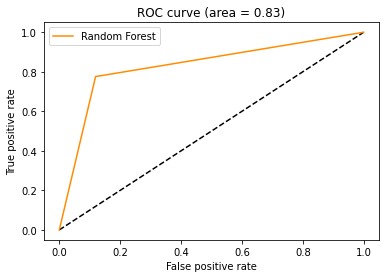

No handles with labels found to put in legend.


ROC for base model : Ada Boosting : 0.828217439766784

Confusion Matrix : 
Confusion Matrix :  [[96 13]
 [24 83]]
Classification Accuracy :  0.8287037037037037
classification_error :  0.1712962962962963
sensitivity :  0.7757009345794392
specificity :  0.8807339449541285
false_positive_rate :  0.11926605504587157
precision :  0.8645833333333334
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

Imp Features : 


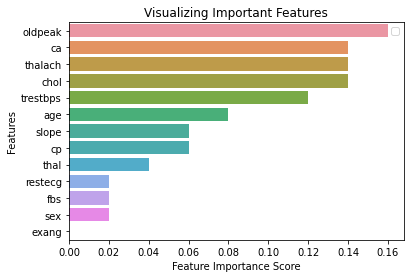

===========================XG Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.2768   │
├───────────────┼──────────┤
│ Test accuracy │ 0.847222 │
├───────────────┼──────────┤
│ precision     │ 0.885417 │
├───────────────┼──────────┤
│ F1            │ 0.837438 │
├───────────────┼──────────┤
│ r2            │ 0.388836 │
├───────────────┼──────────┤
│ AUC           │ 0.846738 │
╘═══════════════╧══════════╛



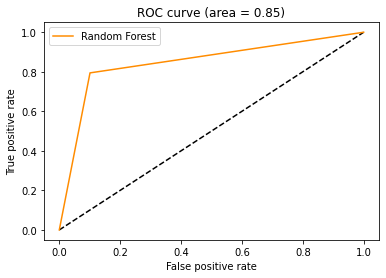

No handles with labels found to put in legend.


ROC for base model : XG Boosting : 0.8467375460859127

Confusion Matrix : 
Confusion Matrix :  [[98 11]
 [22 85]]
Classification Accuracy :  0.8472222222222222
classification_error :  0.1527777777777778
sensitivity :  0.794392523364486
specificity :  0.8990825688073395
false_positive_rate :  0.10091743119266056
precision :  0.8854166666666666
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}

Imp Features : 


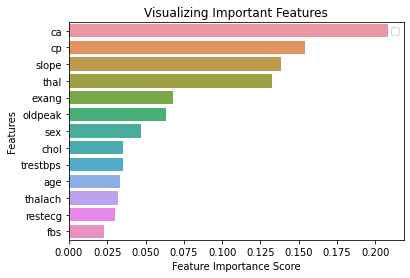

===========================bagging Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 7.03574  │
├───────────────┼──────────┤
│ Test accuracy │ 0.796296 │
├───────────────┼──────────┤
│ precision     │ 0.824742 │
├───────────────┼──────────┤
│ F1            │ 0.784314 │
├───────────────┼──────────┤
│ r2            │ 0.185115 │
├───────────────┼──────────┤
│ AUC           │ 0.79585  │
╘═══════════════╧══════════╛



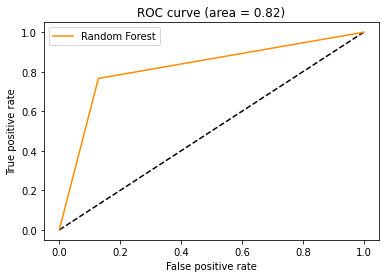

ROC for base model : bagging Classifier : 0.8189573866072193

Confusion Matrix : 
Confusion Matrix :  [[92 17]
 [27 80]]
Classification Accuracy :  0.7962962962962963
classification_error :  0.2037037037037037
sensitivity :  0.7476635514018691
specificity :  0.8440366972477065
false_positive_rate :  0.1559633027522936
precision :  0.8247422680412371
{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Imp Features : 



In [20]:
#spot check algorithms
models=[]
models.append(('Logistic Regression : LR', LogisticRegression()))
models.append(('Linear Discriminant Analysis : LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('GaussianNB : NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Random Forest Classifier : RFC',RandomForestClassifier()))
models.append(('Ada Boosting',AdaBoostClassifier()))
models.append(('XG Boosting',XGBClassifier()))
models.append(('bagging Classifier',BaggingClassifier()))

		    
appended_data = []
# fit, transform and calcualte the metrics for each model
for name, model in models:
    print("==========================="+name+"================================")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Metrics = Print_Metrics(model,y_test,X_test,y_pred,X_train,y_train,name)
    appended_data.append(Metrics)
    print('')
    print('ROC for base model : '+name+ ' : ' + str(evaluate(model,X_train,y_train, X_test, y_test)))
    print('')
    print('Confusion Matrix : ')
    Confusion_Matrix(y_test, y_pred)
    print(model.get_params())
    print('')
    try:
      print('Imp Features : ')
      imp_feature(model)
      
      
    except:
      print('')

Result_Accuracy = pd.concat(appended_data)

###**Summary of the performance by models in descending order**

In [17]:
Result_Accuracy.sort_values(by='Test accuracy', ascending=False)

,ModelName,logloss,Test accuracy,precision,F1,r2,AUC
0,XG Boosting,5.276798,0.847222,0.885417,0.837438,0.388836,0.846738
0,Linear Discriminant Analysis : LDA,5.916424,0.828704,0.843137,0.822967,0.314756,0.828475
0,Ada Boosting,5.916413,0.828704,0.864583,0.817734,0.314756,0.828217
0,Logistic Regression : LR,6.076329,0.824074,0.834951,0.819048,0.296236,0.823888
0,KNN,6.076322,0.824074,0.848485,0.815534,0.296236,0.823716
0,GaussianNB : NB,6.076314,0.824074,0.863158,0.811881,0.296236,0.823545
0,Random Forest Classifier : RFC,6.076322,0.824074,0.848485,0.815534,0.296236,0.823716
0,SVM,6.236235,0.819444,0.826923,0.815166,0.277716,0.819300
0,bagging Classifier,7.355550,0.787037,0.808081,0.776699,0.148075,0.786676
0,Decision Tree Classifier,7.995169,0.768519,0.782178,0.759615,0.073995,0.768241


**Note:** From the above table, XG Boosting, RandomForest, Ada Boosting, KNN Classifier, and SVM were performing in the most effective manner and producing the best results.